In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Question:

If we change the atmospheric concentration of CO2 from 280 umol to ~400 umol, what are the effects on the salish sea system? 


### Subquestions:

    1. Does the system as a whole store more carbon?
    2. Does the surface ocean store more carbon?
    2a. Does the upper layer (top 50m?) store more carbon?
    3. How much of the carbon gets exported to the open ocean?
    4. How much gets taken up by phytoplankton? (black box)
        How to measure this? stronger drawdown?
    5. How much gets outgassed?
    
    
    BUDGET:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT
    Needn't be steady-state
    

In [4]:
# w = BR_ar[0]
# print(w)
# t_nc = nc.Dataset(w)
# surfdat_1 = t_nc.variables['dissolved_inorganic_carbon'][0,0,:,:]

# fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
# cmap = cm.cm.matter
# tplt = np.ma.masked_values(surfdat_1,0)
# v_min = 2000
# v_max = 2000

# viz_tools.set_aspect(ax)
# mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=2000, vmax=2100)

# ax.set_xlabel('x Index', fontsize = 20 )
# ax.set_ylabel('y Index', fontsize = 20 )

# pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
# ax.add_patch(pat)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# cmap.set_bad('aliceblue')
# plt.suptitle('domain for calculation',fontsize=20)


In [5]:
BR_nc = nc.Dataset('BR2015_1styr_massbal.nc')
stor_mol_BR = BR_nc['model_output']['stor_mol_BR']
stor_mol_surf_BR = BR_nc['model_output']['stor_mol_surf_BR']
stor_20_BR = BR_nc['model_output']['stor_mol_20_BR']
stor_flx_BR = BR_nc['model_output']['stor_flx_BR']
stor_trans_BR =BR_nc['model_output']['stor_trans_BR']

ts_BR = np.arange(0,365,1)

PI_nc = nc.Dataset('PI2015_1styr_massbal.nc')
stor_mol_PI = PI_nc['model_output']['stor_mol_PI']
stor_mol_surf_PI = PI_nc['model_output']['stor_mol_surf_PI']
stor_20_PI = PI_nc['model_output']['stor_mol_20_PI']
stor_flx_PI = PI_nc['model_output']['stor_flx_PI']
stor_trans_PI =PI_nc['model_output']['stor_trans_PI']

ts_PI = np.arange(0,365,1)

In [6]:
print(stor_mol_BR[88:91])
print(stor_mol_PI[88:91])

print(4.69899202-4.71169499)

[  4.71828949e+12   4.71701704e+12   4.71499434e+12]
[  4.71310952e+12   4.71169499e+12   4.69899202e+12]
-0.012702969999999425


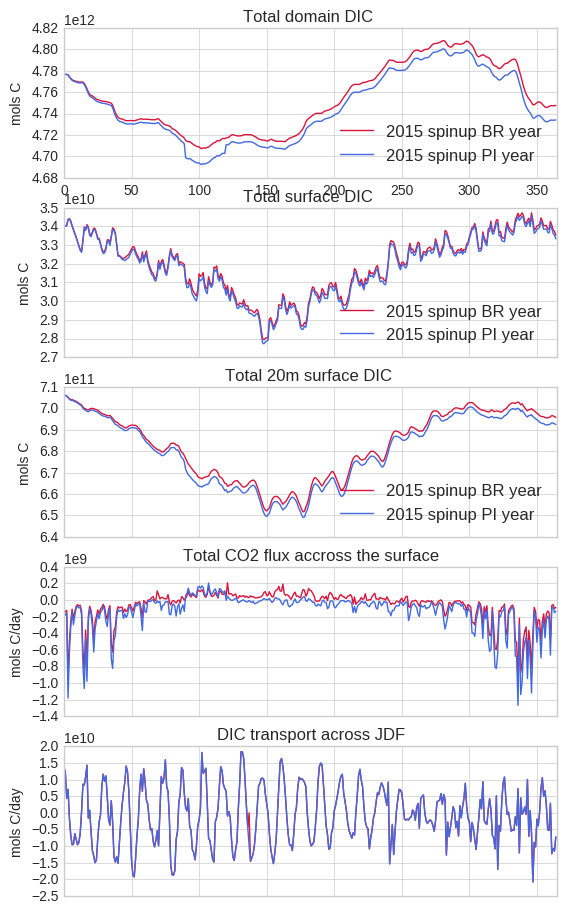

In [7]:
figstring = 'this'
fig = plt.figure(figsize=(10*1.4,8*1.4))

ax = fig.add_subplot(5,2,1)
ax.plot(ts_BR,stor_mol_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_mol_PI,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
ax.legend(loc = 'best')
#ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Total domain DIC ')

ax = fig.add_subplot(5,2,3)
ax.plot(ts_BR,stor_mol_surf_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_mol_surf_PI,color = 'royalblue',label = '2015 spinup PI year')
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Total surface DIC ')

ax = fig.add_subplot(5,2,5)
ax.plot(ts_BR,stor_20_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_20_PI,color = 'royalblue',label = '2015 spinup PI year')
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Total 20m surface DIC ')
 
ax = fig.add_subplot(5,2,7)
ax.plot(ts_BR,stor_flx_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_flx_PI,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('Total CO2 flux accross the surface')

ax = fig.add_subplot(5,2,9)
ax.plot(ts_BR,stor_trans_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_trans_PI,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')

plt.title('DIC transport across JDF')


#t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)


In [8]:
print('end_of_year carbon')
EOY_BR = np.sum(stor_mol_BR[np.size(stor_trans_BR)-1])
EOY_PI = np.sum(stor_mol_PI[np.size(stor_trans_BR)-1])
BR_CCHANGE = (stor_mol_BR[np.size(stor_trans_BR)-1]-(stor_mol_BR[0]))
PI_CCHANGE = (stor_mol_PI[np.size(stor_trans_PI)-1]-(stor_mol_PI[0]))
FLUX_BR = np.sum(stor_flx_BR)
FLUX_PI = np.sum(stor_flx_PI)
JDFTRANS_BR = np.sum(stor_trans_BR)
JDFTRANS_PI = np.sum(stor_trans_PI)
river_load = np.sum(1.645e11)
river_load = np.float32(river_load)
print('baserun')
print(EOY_BR)
print('preind')
print(EOY_PI)
print('difference')
print(EOY_BR - EOY_PI)
print('baserun - change in C')
print(BR_CCHANGE)
print('preind - change in C')
print(PI_CCHANGE)
print('difference')
print(EOY_BR - EOY_PI)
print('')
print('CO2flux')
print('baserun')
print(FLUX_BR)
print('preind')
print(FLUX_PI)
print('difference')
print(FLUX_BR - FLUX_PI)
print('')
print('TRANSPORTS-jdf')
print('baserun trans')
print(JDFTRANS_BR)
print('pi trans')
print(JDFTRANS_PI)
print('difference')
print(JDFTRANS_BR - JDFTRANS_PI)
plt.show()
print('')


print('**')
print('change in C - baserun')
print(BR_CCHANGE)
print('jdfflux + co2 flux')
print(FLUX_BR + JDFTRANS_BR)
print('jdfflux + co2 flux + river_load')
print((FLUX_BR + JDFTRANS_BR + river_load))
print('difference between CHANGE and (jdfflux + co2 flux + river_load)')
blackbox_BR = (BR_CCHANGE - (FLUX_BR + JDFTRANS_BR + river_load))
print(blackbox_BR)
print('**')
print('change in C - pi')
print(PI_CCHANGE)
print('jdfflux + co2 flux')
print(FLUX_PI + JDFTRANS_PI)
print('jdfflux + co2 flux + river_load')
print(FLUX_PI + JDFTRANS_PI + river_load)
print('difference between CHANGE and (jdfflux + co2 flux + river_load)')
blackbox_PI = (PI_CCHANGE - (FLUX_PI + JDFTRANS_PI + river_load))
print(blackbox_PI)

end_of_year carbon
baserun
4.74758e+12
preind
4.73405e+12
difference
1.35392e+10
baserun - change in C
-2.85658e+10
preind - change in C
-4.20856e+10
difference
1.35392e+10

CO2flux
baserun
-2.43455e+10
preind
-5.00577e+10
difference
2.57122e+10

TRANSPORTS-jdf
baserun trans
-1.67104e+11
pi trans
-1.58045e+11
difference
-9.05845e+09

**
change in C - baserun
-2.85658e+10
jdfflux + co2 flux
-1.91449e+11
jdfflux + co2 flux + river_load
-2.6949e+10
difference between CHANGE and (jdfflux + co2 flux + river_load)
-1.61681e+09
**
change in C - pi
-4.20856e+10
jdfflux + co2 flux
-2.08103e+11
jdfflux + co2 flux + river_load
-4.36028e+10
difference between CHANGE and (jdfflux + co2 flux + river_load)
1.51714e+09


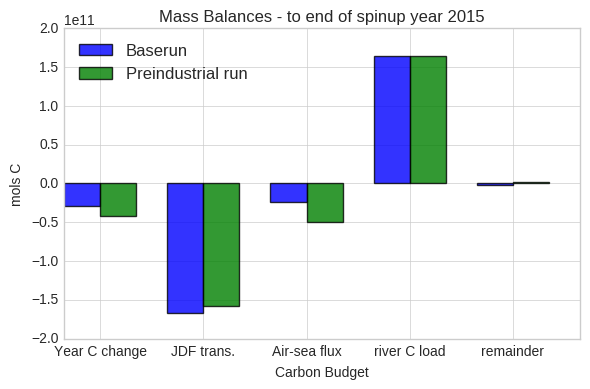

In [9]:
# data to plot
n_groups = 5
BR_stats = (BR_CCHANGE, JDFTRANS_BR, FLUX_BR, river_load, blackbox_BR)
PI_stats = (PI_CCHANGE, JDFTRANS_PI, FLUX_PI, river_load, blackbox_PI)


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, BR_stats, bar_width,
alpha=opacity,
color='b',
label='Baserun')

rects2 = plt.bar(index + bar_width, PI_stats, bar_width,
alpha=opacity,
color='g',
label='Preindustrial run')

plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to end of spinup year 2015')
plt.xticks(index + bar_width, ('Year C change', 'JDF trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

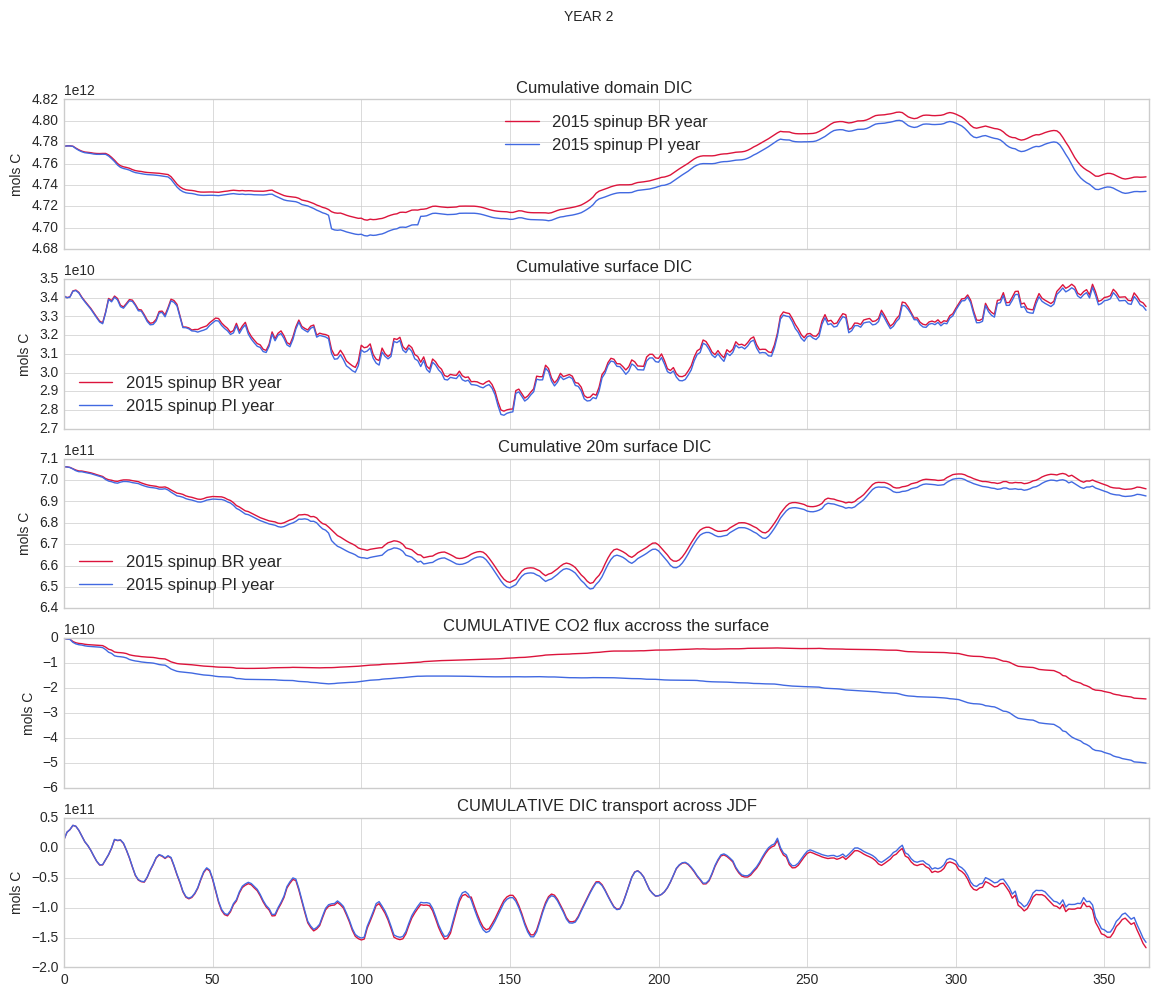

In [10]:
flx_BR = stor_flx_BR[:]
flx_PI = stor_flx_PI[:]

trans_BR = stor_trans_BR[:]
trans_PI = stor_trans_PI[:]

flx_BR_cum = np.cumsum(flx_BR)
flx_PI_cum = np.cumsum(flx_PI)

trans_BR_cum = np.cumsum(trans_BR)
trans_PI_cum = np.cumsum(trans_PI)

figstring = 'this'
fig = plt.figure(figsize=(10*1.4,8*1.4))

ax = fig.add_subplot(5,1,1)
ax.plot(ts_BR,stor_mol_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_mol_PI,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(5,1,2)
ax.plot(ts_BR,stor_mol_surf_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_mol_surf_PI,color = 'royalblue',label = '2015 spinup PI year')
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(5,1,3)
ax.plot(ts_BR,stor_20_BR,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,stor_20_PI,color = 'royalblue',label = '2015 spinup PI year')
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 
ax = fig.add_subplot(5,1,4)
ax.plot(ts_BR,flx_BR_cum,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,flx_PI_cum,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('CUMULATIVE CO2 flux accross the surface')

ax = fig.add_subplot(5,1,5)
ax.plot(ts_BR,trans_BR_cum,color = 'crimson',label = '2015 spinup BR year')
ax.plot(ts_BR,trans_PI_cum,color = 'royalblue',label = '2015 spinup PI year')
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C')

plt.title('CUMULATIVE DIC transport across JDF')

plt.suptitle('YEAR 2')

#t_figstring = './FIGS/' + figstring + 'cumuflx.jpg'


#fig.savefig(t_figstring)
